In [1]:
import pandas as pd

# Load the dataset
file_path = '/Users/lakshna/Documents/Python/healthcare_dataset.csv'
data = pd.read_csv(file_path)

# relevant columns for analysis
data_subset = data[['Blood Type', 'Gender', 'Test Results']]


print(data_subset.head())


  Blood Type  Gender  Test Results
0         B-    Male        Normal
1         A+    Male  Inconclusive
2         A-  Female        Normal
3         O+  Female      Abnormal
4        AB+  Female      Abnormal


In [3]:
# Group by Blood Type, Gender, and Test Results
grouped_counts = data_subset.groupby(['Blood Type', 'Gender', 'Test Results']).size().unstack(fill_value=0)


print(grouped_counts)


Test Results       Abnormal  Inconclusive  Normal
Blood Type Gender                                
A+         Female      1182          1227    1155
           Male        1151          1103    1138
A-         Female      1177          1128    1144
           Male        1159          1170    1191
AB+        Female      1149          1134    1155
           Male        1159          1191    1159
AB-        Female      1150          1139    1172
           Male        1183          1111    1190
B+         Female      1116          1182    1079
           Male        1187          1184    1197
B-         Female      1172          1150    1139
           Male        1176          1118    1189
O+         Female      1209          1112    1143
           Male        1138          1150    1165
O-         Female      1183          1144    1185
           Male        1136          1113    1116


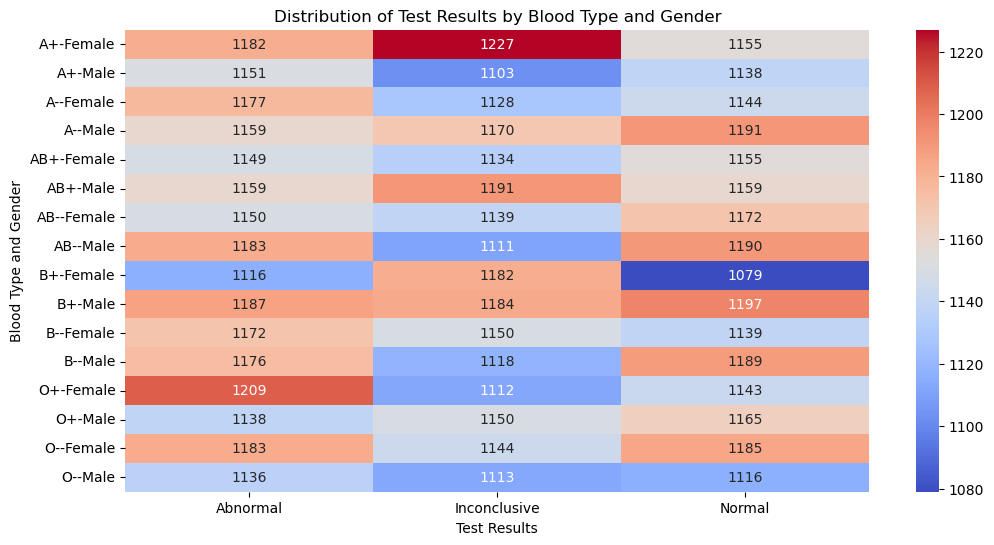

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.heatmap(grouped_counts, annot=True, fmt="d", cmap="coolwarm")
plt.title("Distribution of Test Results by Blood Type and Gender")
plt.xlabel("Test Results")
plt.ylabel("Blood Type and Gender")
plt.show()


In [7]:
from scipy.stats import chi2_contingency

# contingency table
contingency_table = pd.crosstab(index=[data_subset['Blood Type'], data_subset['Gender']],
                                columns=data_subset['Test Results'])

# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Statistic: 21.092430961086286
P-Value: 0.8849753700310982
Degrees of Freedom: 30


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical variables
data_encoded = pd.get_dummies(data_subset, columns=['Blood Type', 'Gender'], drop_first=True)
X = data_encoded.drop(columns=['Test Results'])
y = pd.get_dummies(data_subset['Test Results'], drop_first=True).idxmax(axis=1)  # Convert target to numeric

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.664054054054054
Classification Report:
               precision    recall  f1-score   support

Inconclusive       0.66      1.00      0.80      7371
      Normal       0.00      0.00      0.00      3729

    accuracy                           0.66     11100
   macro avg       0.33      0.50      0.40     11100
weighted avg       0.44      0.66      0.53     11100



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
